## Install Dependencies

In [ ]:
!pip install tensorflow tensorflow-macos tensorflow-metal opencv-python

In [2]:
import tensorflow as tf 
import os
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## Set GPU Growth
Avoid Out of memory error by setting GPU memory consumption

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Remove Dodgy Images

In [4]:
import cv2 
import imghdr

In [5]:
data_dir = 'data'

In [6]:
extensions = ['jpeg','jpg','bmp','png']

In [7]:
os.remove('./data/.DS_Store')

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)): 
        image_path = os.path.join(data_dir, image_class, image) 

        try: 
            img = cv2.imread(image_path) 
            tip = imghdr.what(image_path)
            if tip not in extensions: 
                print('Image not supported {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with Image {}'.format(image_path))

## Load Data

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

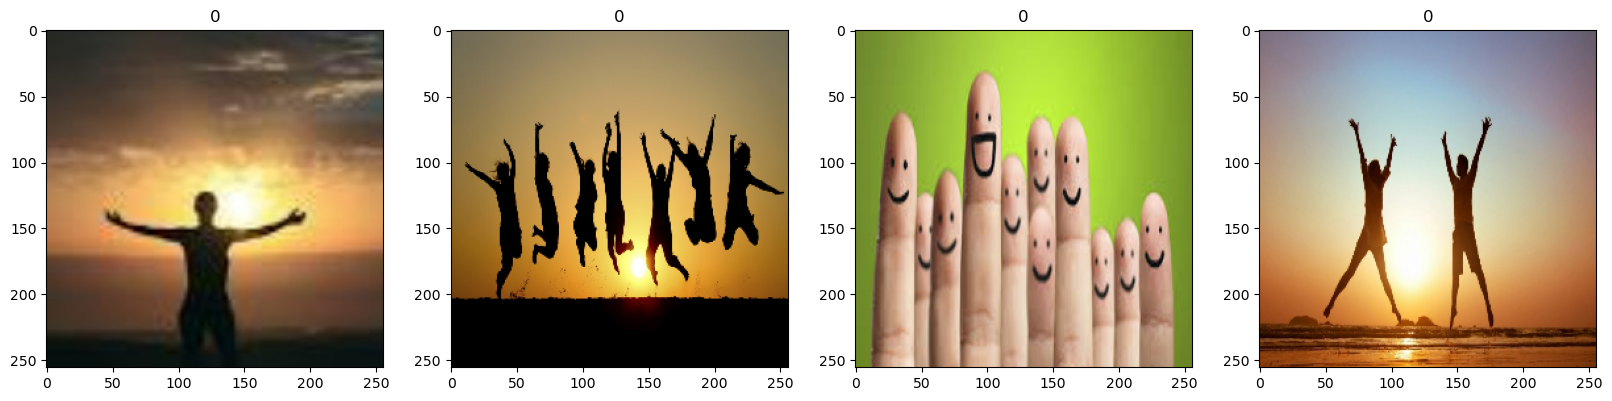

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [14]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

## Split Data

In [17]:
train_size = int(len(data)*.7)
validation_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train = data.take(train_size)
validation = data.take(validation_size)
test = data.take(test_size)
len(test)

1

## Build Deep Learning Model

In [6]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D()) 

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [26]:
logdir = 'logs' 

In [27]:
#Callbacks in TensorFlow are utility functions that perform specific tasks during the training of a model.
# They are used to monitor the training process, modify the behavior of the training loop, and apply custom logic at 
# different stages of the training

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20


2024-12-02 12:49:51.195962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.5547 - loss: 3.8271 - val_accuracy: 0.4688 - val_loss: 2.3183
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.4883 - loss: 1.4709 - val_accuracy: 0.5781 - val_loss: 0.6825
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.4797 - loss: 0.7026 - val_accuracy: 0.5156 - val_loss: 0.6806
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.6093 - loss: 0.6747 - val_accuracy: 0.6250 - val_loss: 0.6552
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.6987 - loss: 0.6413 - val_accuracy: 0.6719 - val_loss: 0.6242
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.6914 - loss: 0.5975 - val_accuracy: 0.7656 - val_loss: 0.5019
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.7272 - loss: 0.5238 - val_accuracy: 0.7812 - val_loss: 0.4364
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.7513 - loss: 0.4745 - val_accuracy: 0.7656 - val_loss: 0.4425
Epo

In [29]:
hist.history

{'accuracy': [0.5446428656578064,
  0.5089285969734192,
  0.5267857313156128,
  0.6294642686843872,
  0.65625,
  0.6830357313156128,
  0.7455357313156128,
  0.8035714030265808,
  0.8392857313156128,
  0.8660714030265808,
  0.9375,
  0.8839285969734192,
  0.9241071343421936,
  0.9464285969734192,
  0.9419642686843872,
  0.9776785969734192,
  0.9776785969734192,
  0.9776785969734192,
  0.9732142686843872,
  0.9553571343421936],
 'loss': [3.8093883991241455,
  1.051181674003601,
  0.6892848014831543,
  0.6713448762893677,
  0.6489318609237671,
  0.5982567667961121,
  0.5260251760482788,
  0.448404997587204,
  0.4052233099937439,
  0.33573126792907715,
  0.2767496407032013,
  0.30254870653152466,
  0.22443367540836334,
  0.1780790090560913,
  0.17844891548156738,
  0.11927413195371628,
  0.09629334509372711,
  0.07555961608886719,
  0.11027650535106659,
  0.11987919360399246],
 'val_accuracy': [0.46875,
  0.578125,
  0.515625,
  0.625,
  0.671875,
  0.765625,
  0.78125,
  0.765625,
  0.828

## Plot Performance

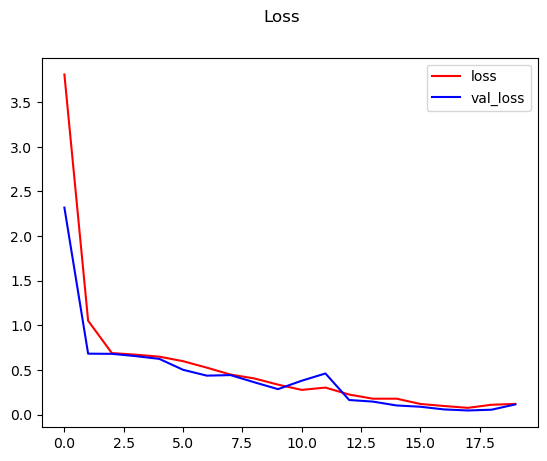

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red', label='loss')
plt.plot(hist.history['val_loss'],color='blue', label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper right')
plt.show()

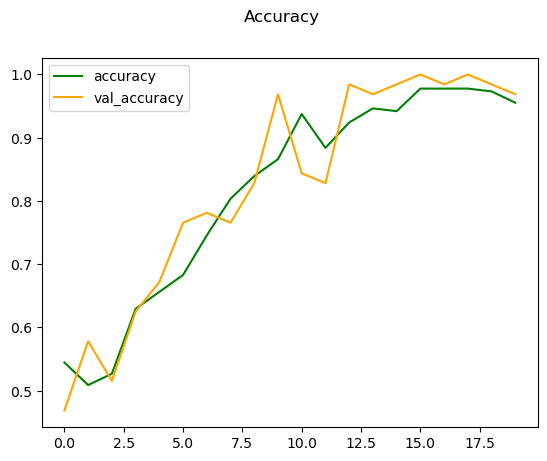

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper left')
plt.show()

## Evaluation

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [34]:
len(test)

1

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch 
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    recall.update_state(y, yhat) 
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


2024-12-02 12:50:49.323914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
print(f'Precision:{pre.result().numpy()}, Recall:{ recall.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.8571428656578064, Accuracy:0.90625


## Testing

In [37]:
import cv2

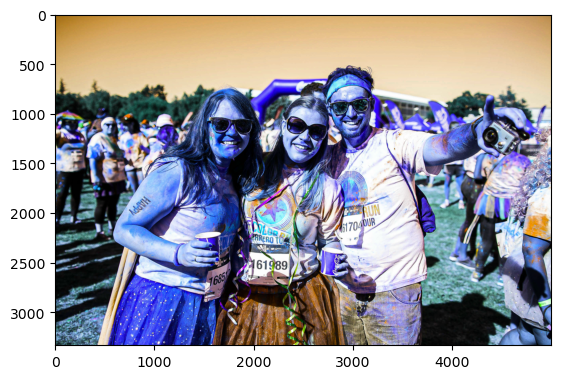

In [55]:
img = cv2.imread('nqobile-vundla-qvGlzkh08QM-unsplash.jpg')
plt.imshow(img)
plt.show()

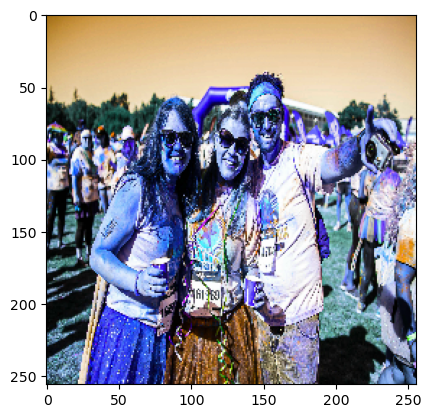

In [56]:
# Resize to match the shape of our input layer
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [58]:
yhat

array([[0.04052914]], dtype=float32)

In [59]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
